Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     10968
        True       0.51      0.52      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357

Confusion Matrix:
[[10275   693]
 [  668   721]]


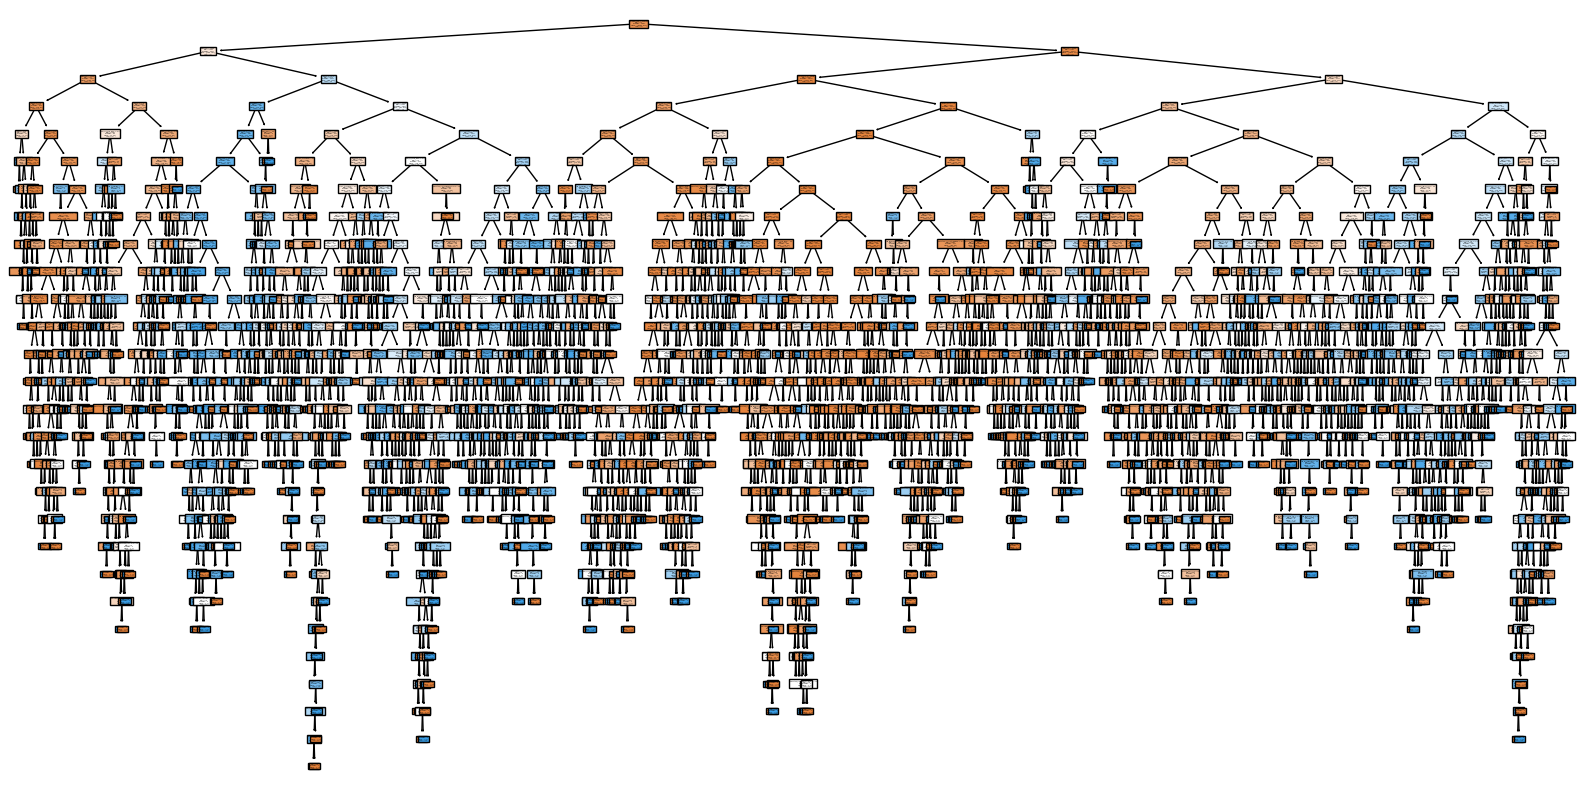

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import zipfile
import io
import requests

# URL to the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Download the dataset
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall('/mnt/data/')

# Load the dataset
df = pd.read_csv('/mnt/data/bank-additional/bank-additional-full.csv', sep=';')

# Preprocess the data
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('y_yes', axis=1)
y = df['y_yes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

# Display feature importance
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)
